In [32]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style

%matplotlib inline

pd.options.display.max_rows = 14

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load and explore the dataset

In [33]:
mnist = fetch_mldata('MNIST original')
# What's the structure of the object returned by sklearn?
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

* DESCR should contain more information about the dataset but unfortunately it most often doesn't
* You should find out more information about the dataset on your own
* features are available in `mnist.data`, labels are available in `mnist.target`

In [34]:
mnist.DESCR

'mldata.org dataset: mnist-original'

In [35]:
X = mnist['data']
y = mnist['target']

X.shape, y.shape
np.sqrt(784)

((70000, 784), (70000,))

28.0

* There are 70,000 observations. 784 features/columns. Each observation has the image data in the form of 28x28 pixels per image. 
* To train, use 784 features as it is. 
* To print in image form, convert each observation(e.g. X[432] or X[766]) to 28x28 form using function `reshape`(e.g. X[22].reshape(28, 28))

5.0

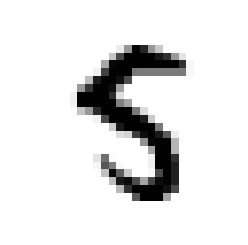

In [36]:
d = X[34911]
l = y[34911]

a = plt.imshow(d.reshape(28, 28), cmap = matplotlib.cm.binary)
a = plt.axis('off')

# what's the label for the above observation?
l

In [37]:
# Split the set: first 60k observations into training set, remaining 10k observations into test set
X_train, y_train = X[:60000], y[:60000]
X_test, y_test  = X[60000:], y[60000:]

In [38]:
# Shuffle the training set. 
# First compute indices in random order so it can be used on both X_train and y_train; may not be needed if both are in the same dataset
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
shuffle_index

array([36618, 26761,  8704, ...,  4105, 49841, 26453])

# Binary Classifier: Is the digit 5 or not?

In [39]:
# Let us create a simple binary classifier that can classify digits 0-9 as two categories: `5` or `not 5`(hence the name)
from sklearn.linear_model import SGDClassifier

# whereever label is 5, set that label to `True` instead
# wherever the label is 0,1,2,3,4,6,7,8,9, set that label to `False` instead
y_train_5 = (y_train == 5) 
y_test_5 = (y_test == 5)   

In [40]:
sgd_clf = SGDClassifier(random_state=42)
x = sgd_clf.fit(X_train, y_train_5)  # train!
x

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [41]:
# predict on a sample observation and check with its label
sgd_clf.predict([d])
l
# Exercise: try out predict() on a few other training observations

array([ True], dtype=bool)

5.0

# Performance Measures

In [42]:
### Calculate accuracy of classification using k-fold cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/user/anaconda3

array([ 0.9636,  0.9607,  0.9637])

* Is ~94-96% accuracy good? Let us see the accuracy of one of the worst classifiers possible.
* What's the accuracy of the classifier that classifies every number as not being 5

* The following classifier does no training at all. Whenever predict is called, it just returns all 0s in the shape of X.
* Do you understand how reshaping is being done here and why?
* If you forgot how required shape can be passed to `np.zeros`: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.zeros.html

In [43]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [44]:
### Calculate accuracy for this dumb classifier
cross_val_score(Never5Classifier(), X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.9093 ,  0.91055,  0.9091 ])

* That's ~90-91% accuracy for this dataset when you always predict `not 5` as the result where the learning part is entirely skipped! 
* Our previous classifier was only ~4% more accurate than one of the worst possible classifiers. 
* Before we think of better classifier models, let us first learn better ways to measure performance  

### A. Confusion Matrix

* Confusion matrix tells us the number of times category A was classified incorrectly as category B, C, D, etc. and similarly for B, C, D, etc.
* E.g. 3rd row and 4th column in the confusion matrix tells us how many times the classifier incorrectly classified the images of 3 with images of 5.
* To create a confusion matrix we need actual labels and predicted labels. use `cross_val_predict` function in this case to get predictions instead of the scores.

### cross_val_predict vs. cross_val_score & predict
* Exercise: Repeat the following with Never5Classifier if you want to even though you know already what that confusion matrix would look like
* `predict` function gives a prediction after the corresponding label has been seen and trained on already
* Predictions obtained via `cross_val_predict` are generated using cross validation technique
* This means that the predictions were generated without looking at the training labels
* How is this possible?

In [45]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_ps = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) 
confusion_matrix(y_train_5, y_ps)

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/user/anaconda3

array([[53468,  1111],
       [ 1129,  4292]])

|  | not 5 | 5 |
|:-:|:-:|:-:|
| not 5 |  |   |
        | 5 |  | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  |

* How to interpret the above result?
  * Rows = actual class & columns = predicted class
* This means:
  * ~50k of the digits that are not digit 5 were correctly classified as `not 5`. These are called as _true negatives_.
  * ~1k of the digits that are not digit 5 were incorrectly classified as `5`. These are called _false positives_. 
  * ~1.5k of the digits that are digit 5 were incorrectly classified as `not 5`. These are called _false negatives_.
  * ~4k of the digits that are digit 5 were correctly classified as `5`. These are called _true positives_.

In [46]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]])

### B. Precision & Recall

$$ Precision = \frac{TP}{TP + FP} $$

$ $

$$ Recall = \frac{TP}{TP + FN} $$

$ $
Where: 

$ $
TP = True positives, FP = False positives, FN = False negatives

In [47]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_ps)
recall_score(y_train_5, y_ps)

0.79437349620581155

0.79173584209555437

### What do these values mean?

* When our SGDClassifier based model predicts a `5`, the accuracy is ~80%.
* It detects ~73% of 5s.
* Precision and recall measures can be combined into one measure called an F1 score:

### C. F1 Score
$ $
$$ F_1 = \frac{TP}{TP + \frac{FN+FP}{2}} $$

$ $
* F1 prefers classifiers that have similar Precision and Recall scores. Sometimes you want classifiers that have high precision or high recall;
  In those cases you still use precision and recall scores as performance measures. Give examples.

In [48]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_ps)

0.79305247597930528

How to get high precision as well as high recall? That's not possible because as one increases the other one decreases and vice-versa.
### Precision/Recall trade-off

How does SGDClassifier work?
* For each observation, it computes a score based on a _decision function_. score > threshold ? class A : class B
* sklearn has no function that let's us control/modify the threshold value used in the decision function.

In [49]:
y_scores = sgd_clf.decision_function([d])
threshold = 0
y_scores > threshold

array([ True], dtype=bool)

In [50]:
threshold = 200000
y_scores > threshold

array([ True], dtype=bool)

Raising the threshold decreases recall.  

8 <===> 7 <===> 3 <===> 9 [1] <===> 5 <===> 2 <===> 5 [2] <====> 5 <===> 6 <====> 5 [3] <===> 5 <===> 5 

[1] (75%, 100%)  
[2] (80%, 67%)  
[3] (100%, 50%)

### PR Curve and Threshold values
How to pick the threshold that satisfies our precision/recall requirements? Look at the Precision/Recall curve and Precision vs. Recall curve.

In [51]:
from sklearn.metrics import precision_recall_curve

def plot_pr_v_t(precisions, recalls, thresholds):
    plt.figure(figsize=(14,8))
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center left')
    plt.ylim(0, 1)
    
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
#precisions.shape
#recalls.shape
#thresholds.shape
plot_pr_v_t(precisions, recalls, thresholds)

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/user/anaconda3

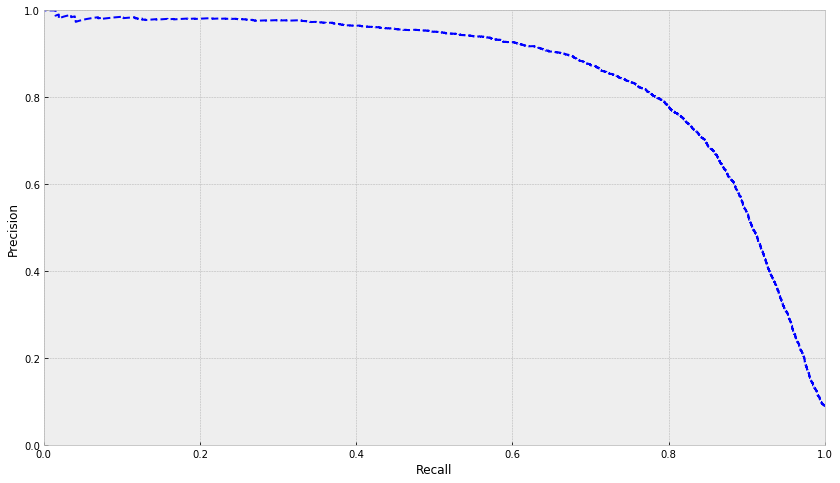

In [52]:
# Precision vs Recall Curve or PR Curve
def plot_p_v_r(precisions, recalls):
    plt.figure(figsize=(14,8))
    plt.plot(recalls, precisions, 'b--')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    
plot_p_v_r(precisions, recalls)

In [53]:
# how to use custom threshold value for predictions? 
y_pred_with_custom_threshold = y_scores > 130000
precision_score(y_train_5, y_pred_with_custom_threshold)
recall_score(y_train_5, y_pred_with_custom_threshold)

0.92834255752985728

0.58789891163991881

### ROC AUC
* Another way to tune the performance of the classifier: ROC AUC
* ROC = Receiver operating characteristic and AUC = Area under curve
* ROC plots _true positive rate_ (i.e. Recall) vs _false positive rate_. 


In [54]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(14,8))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.axis([-0.01, 1, -0.01, 1])
    plt.xlabel('False positive rate(FPR)')
    plt.ylabel('True Positive Rate(TPR)')

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
plot_roc_curve(fpr, tpr)

In [55]:
def roc_curve1(features,labels):
    fpr, tpr,thresholds = roc_curve(features,labels)
    plt.figure(figsize = (14,8))
    plt.plot(fpr,tpr,linewidth=2)

In [56]:
roc_curve1(y_train_5, y_scores)

* As Recall/TPR increases, false positives(FPR) also increase.
* A good classifier stays close to top-left corner(i.e. minimise the area in that region).
* 1 - AUC gives us that area in the top-left corner that needs to be minimised.

In [57]:
from sklearn.metrics import roc_auc_score
1 - roc_auc_score(y_train_5, y_scores)

0.038110909696826845

### Should we use ROC curve or PR curve/Threshold to fine-tune the classifier?
* Prefer PR Curve whenever the positve alss is rare/you need to minimise the false positives more than the false negatives
* Use ROC otherwise

Next Up: Train another model(e.g. RandomForestClassifier and check its ROC AUC score).

## RandomForestClassifier

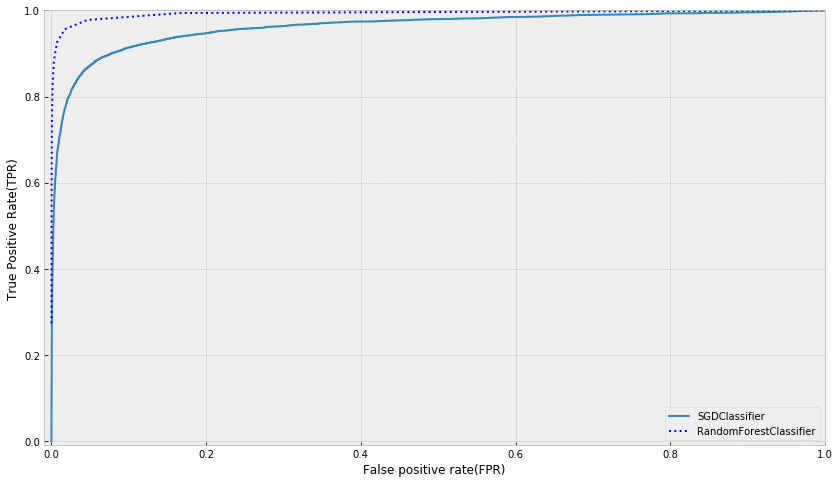

In [58]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
# RFC's `predict_proba` returns probabilities that the given observation belongs to a given class
y_probas = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba') 
# convert probabilities to scores
y_scores_fr = y_probas[:, 1] # probability of positive class
fpr_fr, tpr_fr, thr_fr = roc_curve(y_train_5, y_scores_fr)
plot_roc_curve(fpr, tpr, label='SGDClassifier')
x = plt.plot(fpr_fr, tpr_fr, 'b:', label='RandomForestClassifier')
x = plt.legend(loc='lower right')

In [59]:
roc_auc_score(y_train_5, y_scores_fr)
y_fr_ps = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_fr_ps)
recall_score(y_train_5, y_fr_ps)

0.99315100684885971

0.98203723986856517

0.8269691938756687

In [60]:
# Exercise: plot first 100 digits superimposed with their respective labels
# Exercise: Summarise the steps to train a binary classifier
# Exercise: Use SGDClassifier for multi-classification
# Exercise: Use RandomForestClassifier for multi-classification
# Exercise: Try Guassian Naive Bayes Classifier
# Exercise: Try to increase the size of the training dataset and check if accuracy is increased
# Exercise: Check where the error is highest(one digit vs the others)